# **Week 2: Colab Experiment**

# I. Introduction
In this exercise, we load the Youtube statistics and try to predict the number of subscribers.

# II. Methods












This code analyzes YouTube statistics to predict the number of subscribers a channel will likely have. The following briefly describes the steps:

1. The code loads the global YouTube statistics set and displays it. It then preprocesses the data using one-hot encoding, converting categorical variables such as categories and country abbreviations into numeric representations that can be used in machine learning models.

2. The code uses five-fold cross-validation to split the data into training and test sets. This technique ensures that results are not biased by a specific train-test split.

3. Two regression models are used to predict subscribers: linear regression and ridge regression. The models are trained on the training set and their performance is evaluated on the test set.

In [8]:
# Import the packges
# from google.colab import drive
# drive.mount('/content/drive')
import pandas as pd
from collections import Counter
from datetime import datetime
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

ModuleNotFoundError: No module named 'sklearn'

In [5]:
# Load the csv file
# Replace the path with your own
df = pd.read_csv("/Users/vincent_tiono/Documents/Machine Learning/HW1_Youtubers/Global_YouTube_Statistics_cleaned.csv")

# Display the csv file
display(df)

,Youtuber,subscribers,video views,category,uploads,Abbreviation,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,T-Series,245000000,2.280000e+11,Music,20082,IN,1.0,2.258000e+09,564600.0,9000000.00,...,1.084000e+08,2006.0,3,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,YouTube Movies,170000000,0.000000e+00,Film & Animation,1,US,7423.0,1.200000e+01,0.0,0.05,...,5.800000e-01,2006.0,3,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,MrBeast,166000000,2.836884e+10,Entertainment,741,US,1.0,1.348000e+09,337000.0,5400000.00,...,6.470000e+07,2012.0,2,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,966,US,1.0,1.975000e+09,493800.0,7900000.00,...,9.480000e+07,2006.0,9,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,SET India,159000000,1.480000e+11,Shows,116536,IN,2.0,1.824000e+09,455900.0,7300000.00,...,8.750000e+07,2006.0,9,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,Migos ATL,12400000,6.993406e+09,Music,99,US,171.0,4.941200e+07,12400.0,197600.00,...,2.400000e+06,2012.0,1,17.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
804,Natan por Aï¿,12300000,9.029610e+09,Sports,1200,BR,172.0,5.525130e+08,138100.0,2200000.00,...,2.650000e+07,2017.0,2,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
805,Free Fire India Official,12300000,1.674410e+09,People & Blogs,1500,IN,69.0,6.473500e+07,16200.0,258900.00,...,3.100000e+06,2018.0,9,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
806,RobTopGames,12300000,3.741235e+08,Gaming,39,SE,69.0,3.871000e+06,968.0,15500.00,...,1.858000e+05,2012.0,5,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [6]:
# Use one-hot encoding to convert the categorical variables to numerical variables

# Use get_dummies function to convert 'category' and 'Abbreviation' columns into
# numerical representations using one-hot encoding
df = pd.get_dummies(df, columns=['category', 'Abbreviation'])

# Create a list that contains the names of all columns in df
# whose names start with 'category' or 'Abbreviation'
one_hot_columns = [col for col in df.columns if col.startswith('category_') or col.startswith('Abbreviation_')]

# Convert True/False to 1/0
df_filtered = df[one_hot_columns].astype(int)

# Print the filtered df file
print(df_filtered)

     category_Autos & Vehicles  category_Comedy  category_Education  \
0                            0                0                   0   
1                            0                0                   0   
2                            0                0                   0   
3                            0                0                   1   
4                            0                0                   0   
..                         ...              ...                 ...   
803                          0                0                   0   
804                          0                0                   0   
805                          0                0                   0   
806                          0                0                   0   
807                          0                1                   0   

     category_Entertainment  category_Film & Animation  category_Gaming  \
0                         0                          0                0 

In [7]:
# Define the dependent and independent variables
Y = df[['subscribers']].values
X = df.loc[:, np.isin(df.columns, ['subscribers', 'Youtuber'])==False].values

In [8]:
# Create a KFold object that will split data into 5 folds for
# cross-validation, shuffling the data
# and using a random seed (7) for reproducibility.
num_folds = 5
kf = KFold(n_splits = num_folds, shuffle = True, random_state = 7)

# Generates the indices for the training and testing sets for each of
# the 5 folds and stores them in a list
fold_data = list(kf.split(X))

In [ ]:
# Create two NumPy arrays and intialized with NaN values
# They will be used to store the predicted subscribers
# from the linear and ridge regression models
Y_est_linear = np.full([len(Y),1], np.nan)
Y_est_ridge = np.full([len(Y),1], np.nan)

# Iterate through 5 folds
for fold_id in range(num_folds):

  # Get the current fold's indices
    train_index, test_index = fold_data[fold_id]

    # Split the data into X_train, Y_train for training;
    # X_test, Y_test for prediction
    X_train, Y_train = X[train_index], Y[train_index]
    X_test, Y_test = X[test_index], Y[test_index]


  # Linear regression
  # Train on the training data, and use the trained model
  # to predict the target variable for the test data
  # Store the predicted values in the Y_est_linear array
    linear_model = LinearRegression()
    linear_model.fit(X_train, Y_train)
    Y_est_linear[test_index] = linear_model.predict(X_test)

  # Ridge regression
  # Train on the training data, and use the trained model
  # to predict the target variable for the test data
  # Store the predicted values in the Y_est_ridge array
    ridge_model = Ridge()
    ridge_model.fit(X_train, Y_train)
    Y_est_ridge[test_index] = ridge_model.predict(X_test)

# Add two new columns to df:
# Estimated_subscribers_linear and Estimated_subscribers_ridge,
# each stores predicted values from Y_est_linear and
# Y_est_ridge
df['Estimated_subscribers_linear'] = Y_est_linear
df['Estimated_subscribers_ridge'] = Y_est_ridge

: 

## III. Results

Post hoc analysis to examine the correlation and RMSE between the true number of subscribers and the predicted number of subscribers.

In [10]:
# Define a function named plot_function:
# Take df, x_variable, and y_variable as input,
# Create a scatter plot of the two variables,
# Calculates the correlation and root mean squared error
# between true and predicted number of subscribers
def plot_function(df, x_variable, y_variable):
  plt.figure(figsize = (5,5) , dpi=150)
  sns.scatterplot(data=df, x=x_variable, y=y_variable)
  corr = round(pearsonr(df[x_variable], df[y_variable])[0],3)
  rmse = round(mean_squared_error(df[x_variable], df[y_variable], squared=False),3)
  plt.title(f"corr = {corr} \n RMSE={rmse}")
  plt.show()

/Users/vincent_tiono/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


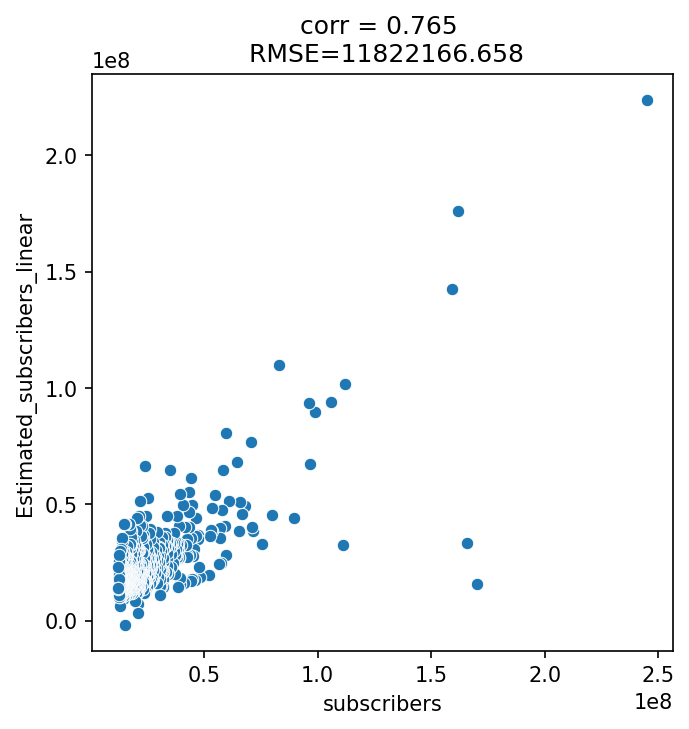

/Users/vincent_tiono/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


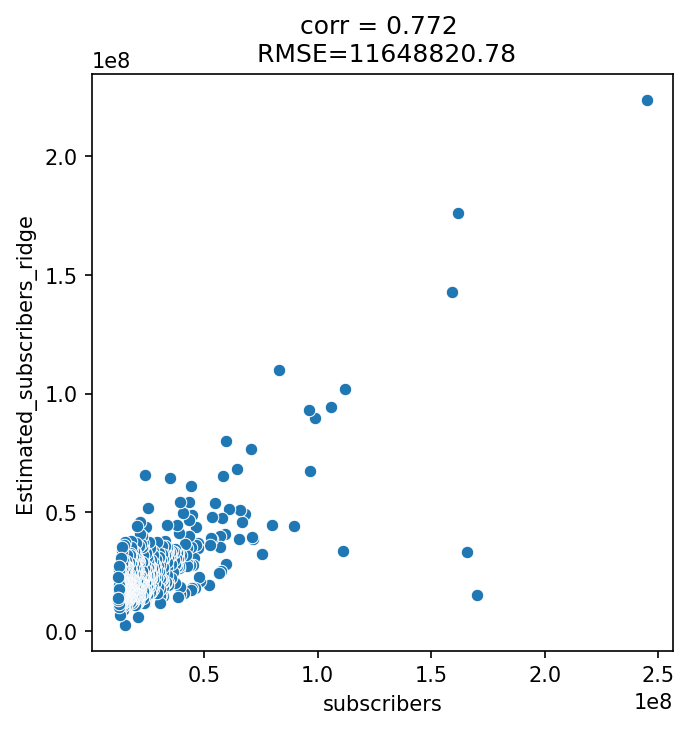

In [11]:
# Call the plot functions
plot_function(df, "subscribers", "Estimated_subscribers_linear")
plot_function(df, "subscribers", "Estimated_subscribers_ridge")

# IV. Conclusion and Discussion



This code analyzes YouTube subscriber data using linear and ridge regression models. The data is preprocessed using one-hot encoding of categorical variables and split into training and testing sets using five-fold cross-validation. Both models are trained and evaluated, and their performance is visualized using scatterplots showing the correlation and RMSE between actual and predicted subscribers' counts. This analysis helps understand how well the model predicts YouTube channel subscribers, and can be further extended to optimize model parameters or explore other related features.

Using **five-fold Cross-Validation**, we can more robustly estimate our model performance compared to a single train-test split. This can help to reduce bias and variance in the evaluation. However, it can be computationally more expensive than a single train-test split, especially with large datasets or complex models. In our case, the dataset is relatively small, so computational complexity is not a significant concern.

Using **Linear Regression** and **Ridge Regression**, we can predict the number of subscribers, but ridge regression is generally preferred when there is a risk of overfitting by adding a shrinkage penalty term to the loss function. In our case, Ridge Regression performs better, since it has a lower RMSE, indicating better prediction accuracy.

In the future, I propose implementing one-hot encoding, K-fold cross-validation, linear regression, and ridge regression from scratch.